In [16]:
import numpy as np
import pandas as pd
import seaborn 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [17]:
df = sns.load_dataset("tips")

In [18]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [20]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


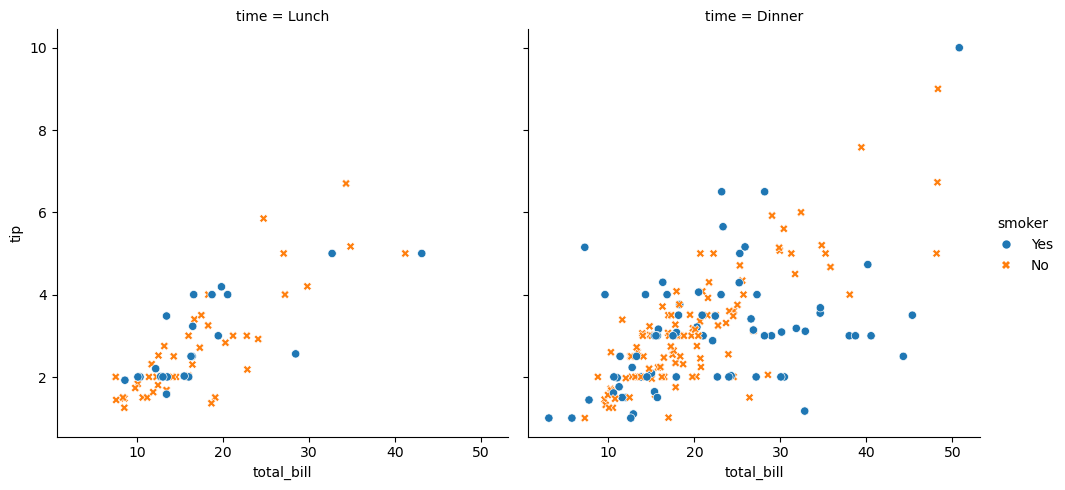

In [21]:
sns.relplot(data=df, x='total_bill', y='tip', col='time', hue='smoker', style='smoker')
plt.show()

In [22]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [28]:
df.replace({ 'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}} ,inplace=True) # This is better
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3


In [29]:
days = pd.get_dummies(df['day'], dtype=int)
df = pd.concat([df,days], axis=1)
days.sample(5)

,Thur,Fri,Sat,Sun
125,1,0,0,0
224,0,1,0,0
185,0,0,0,1
47,0,0,0,1
173,0,0,0,1


In [30]:
times = pd.get_dummies(df['time'], dtype=int)
df = pd.concat([df,times], axis=1)
days.sample(5)

,Thur,Fri,Sat,Sun
80,1,0,0,0
212,0,0,1,0
155,0,0,0,1
127,1,0,0,0
223,0,1,0,0


In [31]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size,Thur,Fri,Sat,Sun,Lunch,Dinner
0,16.99,1.01,1,0,Sun,Dinner,2,0,0,0,1,0,1
1,10.34,1.66,0,0,Sun,Dinner,3,0,0,0,1,0,1


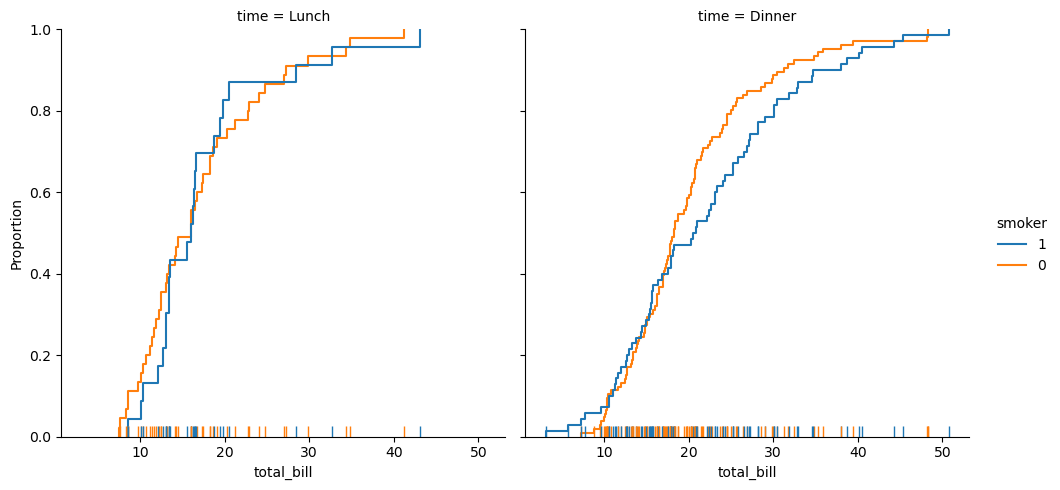

In [34]:
sns.displot(data=df, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)
plt.show()

In [37]:
sns.lmplot(data=df, x="total_bill", y="tip", col="time", hue="smoker")